In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Habermans.csv into pandas as a dataframe
Haberman = pd.read_csv("D:\TGM\ML\Habermans-Survival-Data-Set\haberman.csv")
Haberman['Surv_Status'] = Haberman['Surv_Status'].map({1:'Yes', 2:'N0'})
Haberman.head()

,Age,Op_Year,Axil_Nodes,Surv_Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [128]:
print('Data points, Features:',Haberman.shape)

Data points, Features: (306, 4)


In [4]:
print(Haberman.columns)

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')


In [ ]:
# Q: How many people are survived more than 5 years or more 
#Q: How many people were died within 5 years
# 1 or 'Yes' is the indication of survived people 5 or more years; and 2 or 'No' is the indication of people were died within 5 years
Haberman['Surv_Status'].value_counts()

# 2D Scatter

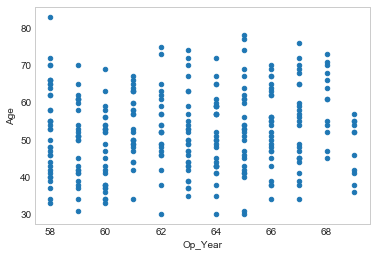

In [136]:
Haberman.plot(kind='scatter',x='Op_Year',y='Age')
plt.grid()
plt.show()
#Here we are not able to distinguish between the two featurs or class label.

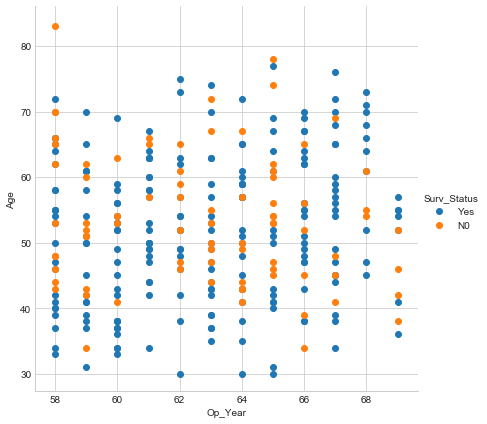

In [137]:
sns.set_style("whitegrid")
sns.FacetGrid(Haberman, hue='Surv_Status', size=6).map(plt.scatter, 'Op_Year', 'Age').add_legend()
plt.show()

# Observations:
    Here survival staus 'Yes' and 'No' both are overlapped using Op_Year and Age featurs. So the classification between both is not possible.

# Pair Plots

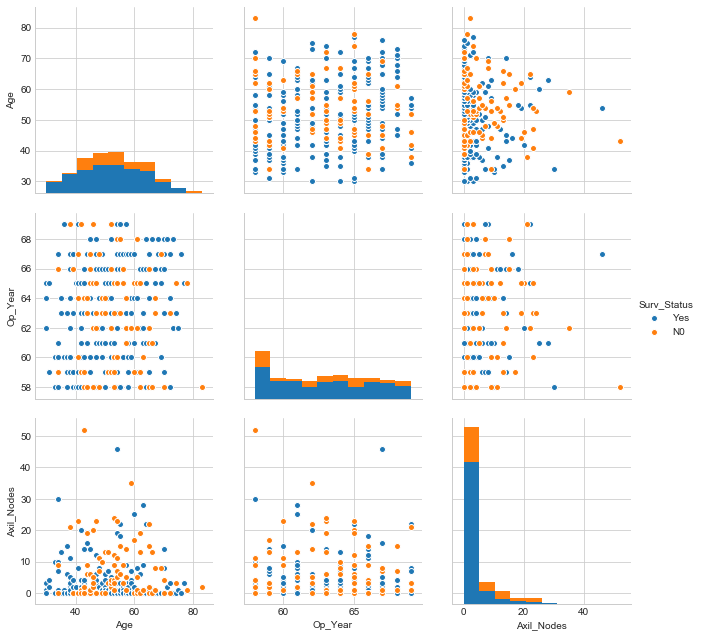

In [61]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(Haberman, hue='Surv_Status',  size=3)
plt.show()

# Observation: 
Above upper dignoal and lower diagnoal graphs are same, only the x and y axis's are interchanged.
The data points are overlapped in each graph.

# Histogram, PDF, CDF

# 1-D Scatter Plot

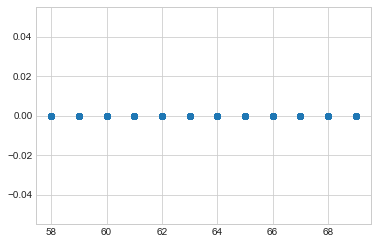

In [44]:
Haberman_Yes = Haberman.loc[Haberman['Surv_Status'] == 'Yes']
Haberman_No = Haberman.loc[Haberman['Surv_Status'] == 'No']

plt.plot(Haberman_Yes['Op_Year'], np.zeros_like(Haberman_Yes['Op_Year']),'o')
plt.plot(Haberman_No['Op_Year'], np.zeros_like(Haberman_No['Op_Year']),'o')
plt.show()

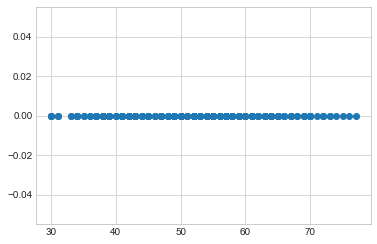

In [138]:
plt.plot(Haberman_Yes['Age'], np.zeros_like(Haberman_Yes['Age']),'o')
plt.plot(Haberman_No['Age'], np.zeros_like(Haberman_No['Age']),'o')
plt.show()

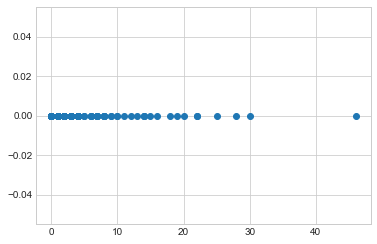

In [139]:
plt.plot(Haberman_Yes['Axil_Nodes'], np.zeros_like(Haberman_Yes['Axil_Nodes']),'o')
plt.plot(Haberman_No['Axil_Nodes'], np.zeros_like(Haberman_No['Axil_Nodes']),'o')
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


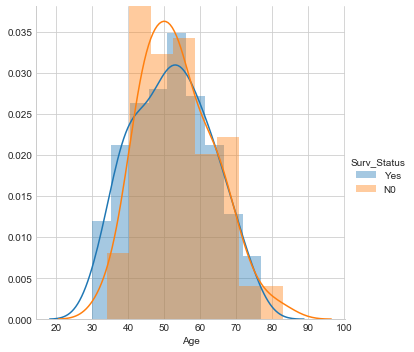

In [11]:
sns.FacetGrid(Haberman, hue='Surv_Status', size=5).map(sns.distplot, 'Age').add_legend();
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


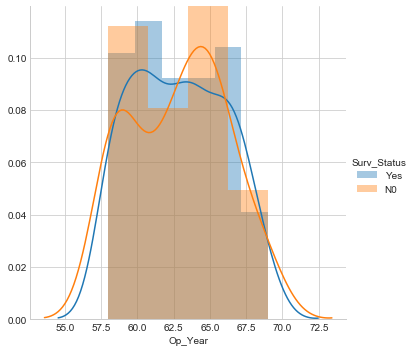

In [12]:
sns.FacetGrid(Haberman, hue='Surv_Status', size=5).map(sns.distplot, 'Op_Year').add_legend();
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


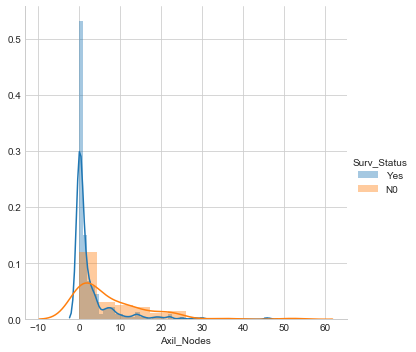

In [13]:
sns.FacetGrid(Haberman, hue='Surv_Status', size=5).map(sns.distplot, 'Axil_Nodes').add_legend();
plt.show()

pdf: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0.5,0,'Op_Year')

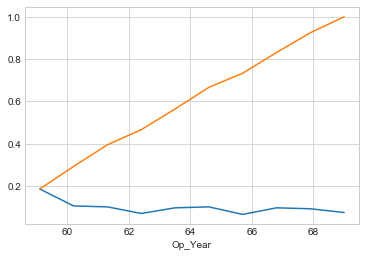

In [64]:
counts, bin_edges = np.histogram(Haberman_Yes['Op_Year'], bins=10, density=True)
pdf=counts/(sum(counts))
print('pdf:',pdf)
print('bin_edges:',bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Op_Year')

#counts, bin_edges = np.histogram(Haberman_Yes['Op_Year'], bins=20, density=True)
#pdf=counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf)
#plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


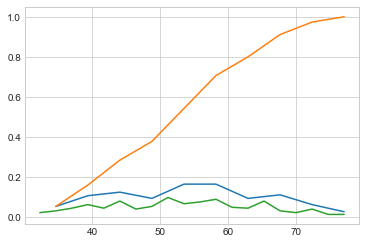

In [25]:
counts, bin_edges = np.histogram(Haberman_Yes['Age'], bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Haberman_Yes['Age'], bins=20, density=True)
pdf=counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show()

# Mean, Variance and Std-dev

In [143]:
print('Means:')
print('Mean of Survived people of the Year:',np.mean(Haberman_Yes['Op_Year']))
print('Mean with outlier of survived of the Year :',np.mean(np.append(Haberman_Yes['Op_Year'],50)))
print('**********************************************')

print('Means:')
print('Mean of Survived people of the Age:',np.mean(Haberman_Yes['Age']))
print('Mean with outlier Survived people of the Age:', np.mean(np.append(Haberman_Yes['Age'],50)))


print('\nStd-dev:')
print('Std dev of Survived people of the Year:',np.std(Haberman_Yes['Op_Year']))

print('Std dev of Survived people of the Age:',np.std(Haberman_Yes['Age']))

Means:
Mean of Survived people of the Year: 62.86222222222222
Mean with outlier of survived of the Year : 62.80530973451327
**********************************************
Means:
Mean of Survived people of the Age: 52.01777777777778
Mean with outlier Survived people of the Age: 52.008849557522126

Std-dev:
Std dev of Survived people of the Year: 3.2157452144021956
Std dev of Survived people of the Age: 10.98765547510051


# Median, Percentile, Quantile, IQR, MAD

In [144]:
print('Medians')
print('Median of Survived people of the Year:',np.median(Haberman_Yes['Op_Year']))
print('Median with outlier of Survived people of the Year:',np.median(np.append(Haberman_Yes['Op_Year'],50)))

print('Median of Survived people of the Age:',np.median(Haberman_Yes['Age']))
print('Median with outlier of Survived people of the Year:',np.median(np.append(Haberman_Yes['Age'],50)))

Medians
Median of Survived people of the Year: 63.0
Median with outlier of Survived people of the Year: 63.0
Median of Survived people of the Age: 52.0
Median with outlier of Survived people of the Year: 52.0


In [146]:
print('Quantiles')
print('Year of Operation:', np.percentile(Haberman_Yes['Op_Year'],np.arange(0,100,25)))
print('Age:',np.percentile(Haberman_Yes['Age'],np.arange(0,100,25)))

Quantiles
Year of Operation: [58. 60. 63. 66.]
Age: [30. 43. 52. 60.]


In [145]:
print('90th Percentiles')
print('90th Percentile of the Year:',np.percentile(Haberman_Yes['Op_Year'],90))
print('90th Percentile of the Age:',np.percentile(Haberman_Yes['Age'],90))

90th Percentiles
90th Percentile of the Year: 67.0
90th Percentile of the Age: 67.0


In [148]:
from statsmodels import robust
print('Median Absolute Deviation')
print('MAD of the Year:',robust.mad(Haberman_Yes['Op_Year']))
print('MAD of the Age',robust.mad(Haberman_Yes['Age']))

Median Absolute Deviation
MAD of the Year: 4.447806655516806
MAD of the Age 13.343419966550417


# Box Plot and Whiskers

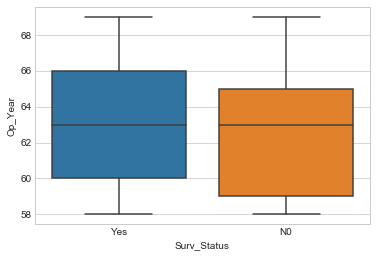

In [103]:
sns.boxplot(x='Surv_Status', y='Op_Year', data=Haberman)
plt.show()

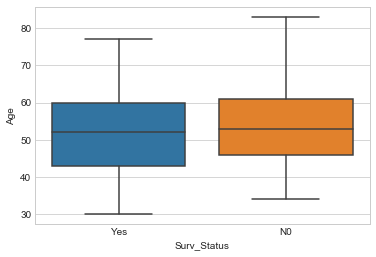

In [117]:
sns.boxplot(x='Surv_Status', y='Age', data=Haberman)
plt.show()

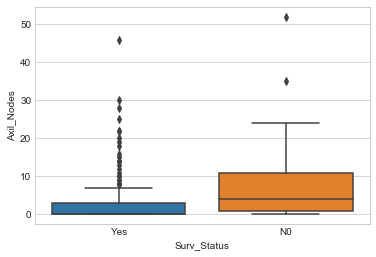

In [118]:
sns.boxplot(x='Surv_Status', y='Axil_Nodes', data=Haberman)
plt.show()

# Violin Plots

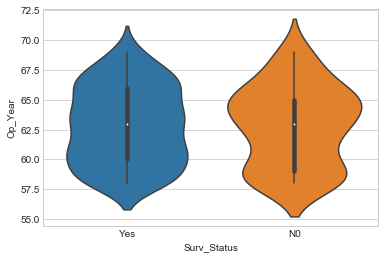

In [105]:
sns.violinplot(x='Surv_Status', y='Op_Year', data=Haberman, size=8)
plt.show()

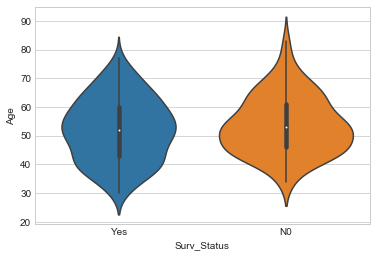

In [106]:
sns.violinplot(x='Surv_Status', y='Age', data=Haberman, size=8)
plt.show()

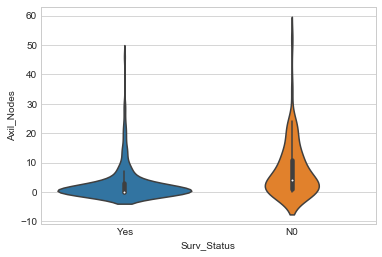

In [119]:
sns.violinplot(x='Surv_Status', y='Axil_Nodes', data=Haberman, size=8)
plt.show()

# Contour Plot

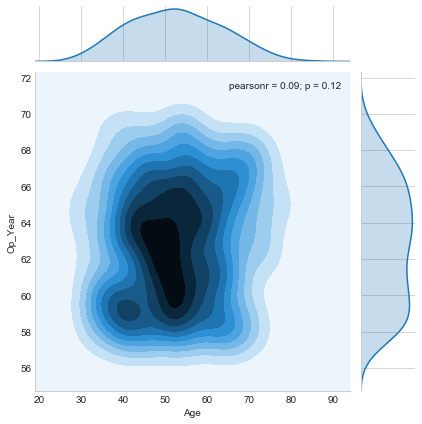

In [127]:
sns.jointplot(x='Age', y='Op_Year', data=Haberman, kind='kde')
plt.show()

In [149]:
!jupyter nbconvert --to html Habermans_dataset.ipynb

[NbConvertApp] Converting notebook Habermans_dataset.ipynb to html
[NbConvertApp] Writing 683169 bytes to Habermans_dataset.html
